reference:

* http://learningjulia.com/2017/02/20/getting-started-with-images.html

In [1]:
using Images, TestImages, Colors # load image


In [2]:
using Random, Distributions # normal etc

In [3]:
using Plots # basic plot

In [4]:
using ImageFiltering

In [5]:
using Random, Distributions

In [6]:
#using ImageView # imshow

In [7]:
#img = testimage("lighthouse")


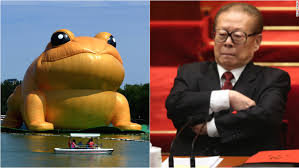

In [8]:
img = load("toad_and_jiang.jpg")

In [9]:
img[1,1,1]

In [10]:
summary(img)

"168×299 Array{RGB{N0f8},2} with eltype RGB{Normed{UInt8,8}}"

In [11]:
c = img[10];

In [12]:
println(c.r, " ", c.g, " ", c.b);
println(red(c), " ", green(c), " ", blue(c));


0.651N0f8 0.765N0f8 0.882N0f8
0.651N0f8 0.765N0f8 0.882N0f8


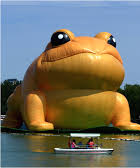

In [13]:
simg = img[1:size(img,1),1:140]

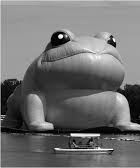

In [14]:
toad = Gray.(simg)

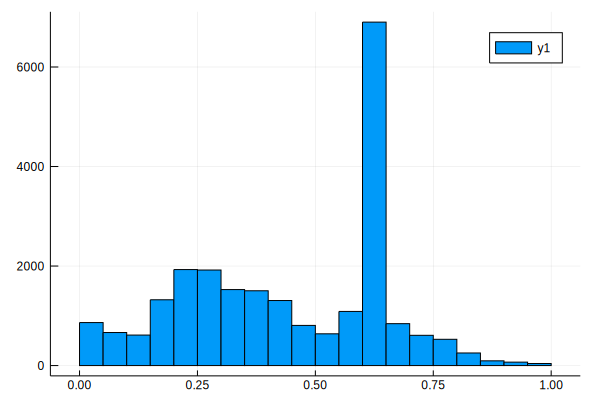

In [15]:
histogram(vec(convert(Array{Float64}, toad)))

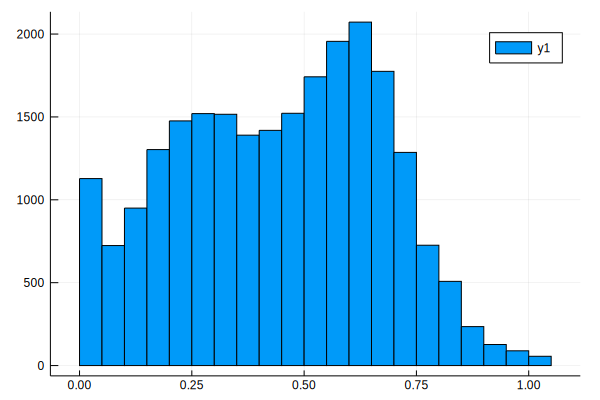

In [16]:
toad_noised = clamp.(convert(Array{Float64}, toad + rand(Normal(0,25/255), size(toad))), 0.0, 1.0)
histogram(vec(toad_noised))

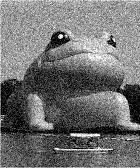

In [17]:
Gray.(toad_noised)

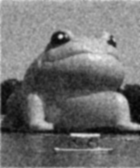

In [18]:
imfilter(Gray.(toad_noised), Kernel.gaussian(1))

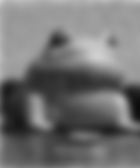

In [19]:
imfilter(Gray.(toad_noised), Kernel.gaussian(4))

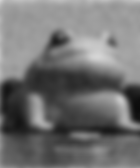

In [20]:
imfilter(Gray.(toad_noised), Kernel.gaussian(3))

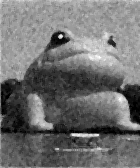

In [21]:
Gray.(mapwindow(median, toad_noised, (3,3))) # https://github.com/JuliaImages/ImageFiltering.jl/pull/14

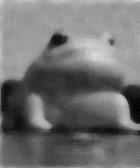

In [22]:
Gray.(mapwindow(median, toad_noised, (9,9))) # https://github.com/JuliaImages/ImageFiltering.jl/pull/14

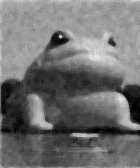

In [23]:
Gray.(mapwindow(median, toad_noised, (5,5))) # https://github.com/JuliaImages/ImageFiltering.jl/pull/14

In [24]:
ii = [i for i=1:size(toad_noised,1),j=1:size(toad_noised,2)] 
jj = [j for i=1:size(toad_noised,1),j=1:size(toad_noised,2)] 
# simulate ngrid/meshgrid since julia reject to expose this function as a independent one: 
# https://github.com/JuliaAttic/Examples/blob/master/ndgrid.jl
#iijj = cat(ii,jj,dims=3) # interesting, julia use `cat` as numpy.stack and numpy.concatenate 
iijj = cat(reshape(ii,1,size(ii,1),size(ii,2)),reshape(jj,1,size(jj,1),size(jj,2)),dims=1)
size(iijj)

(2, 168, 140)

In [25]:
IJ = reshape(iijj, 2, size(iijj,2)*size(iijj,3))
size(IJ)

(2, 23520)

In [26]:
IJ

2×23520 Array{Int64,2}:
 1  2  3  4  5  6  7  8  9  10  11  12  …  162  163  164  165  166  167  168
 1  1  1  1  1  1  1  1  1   1   1   1     140  140  140  140  140  140  140

In [27]:
IJ[1:5,:],IJ[1995:2000,:]

BoundsError: BoundsError: attempt to access 2×23520 Array{Int64,2} at index [1:5, Base.Slice(Base.OneTo(23520))]

In [28]:
ij = [50;100]

2-element Array{Int64,1}:
  50
 100

In [29]:
dis = Normal()
K = x->pdf(dis,x)

#7 (generic function with 1 method)

In [30]:
Wx = K.(sum(abs.(ij .- IJ),dims=1))

1×23520 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [31]:
#Gray.(reshape(Wx, size(toad,1), size(toad,2)))

In [32]:
size(Wx)

(1, 23520)

In [33]:
_X = sum(ij .- IJ, dims=1)

1×23520 Array{Int64,2}:
 148  147  146  145  144  143  142  …  -153  -154  -155  -156  -157  -158

In [34]:
X = cat(1, _X, dims=1)

2×23520 Array{Int64,2}:
   1    1    1    1    1    1    1  …     1     1     1     1     1     1
 148  147  146  145  144  143  142     -153  -154  -155  -156  -157  -158

In [35]:
Y = reshape(toad_noised, 1, size(toad_noised,1)*size(toad_noised,2))

1×23520 Array{Float64,2}:
 0.964638  0.780165  0.859846  0.835549  …  0.463192  0.332467  0.71545

In [36]:
#a = inv((X .* Wx) @ X) @ (X.T * Wx) @ Y

In [37]:
size(X),size(Wx),size(X)

((2, 23520), (1, 23520), (2, 23520))

In [38]:
a = inv((X .* Wx) * X') * (X .* Wx) * Y'

2×1 Array{Float64,2}:
  0.774606460733783   
 -0.008971714853090347

In [39]:
a[1]/a[2]

-86.33872937535084

In [40]:
ones(10,10)

10×10 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [41]:
@time begin

    mat = zeros(3, size(toad_noised,1), size(toad_noised,2))

    for i=1:size(toad_noised,1)
        for j=1:size(toad_noised,2)
            ij = [i;j]
            Wx = K.(sum(abs.(ij .- IJ),dims=1))
            _X = sum(ij .- IJ, dims=1)
            X = cat(1, _X, dims=1)

            l = inv((X .* Wx) * X') * (X .* Wx)
            a = l * Y'

            mat[1,i,j] = a[1,1]
            mat[2,i,j] = a[2,1]
            mat[3,i,j] = sum(l.^2)
        end
    end

end

 88.371620 seconds (1.11 G allocations: 86.705 GiB, 7.26% gc time)


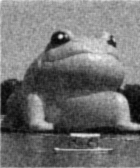

In [42]:
Gray.(mat[1,:,:])

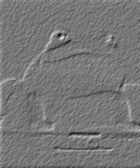

In [43]:
Gray.((mat[2,:,:] .- minimum(mat[2,:,:]))./(maximum(mat[2,:,:])-minimum(mat[2,:,:])))

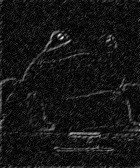

In [44]:
coef = abs.(mat[2,:,:])
coef_min = minimum(coef)
coef_max = maximum(coef)
Gray.((coef .- coef_min)./(coef_max - coef_min))

In [45]:
coef

168×140 Array{Float64,2}:
 0.086863     0.094027    0.0913865    …  0.0373418   0.0337565   0.113512   
 0.0667948    0.0896851   0.0488002       0.0266827   0.0543778   0.0857791  
 0.0436295    0.0635393   0.00857348      0.0156202   0.026723    0.0198805  
 0.0785175    0.0492304   0.00996009      0.00330041  0.00226423  0.0059593  
 0.0269455    0.00767012  0.0100842       0.0111824   0.00565753  2.87553e-5 
 0.0093773    0.0576002   0.0490273    …  0.00872869  0.0153052   0.0085336  
 0.0446069    0.0620506   0.0170381       0.00138095  0.0172439   0.00465586 
 0.0428856    0.0131153   0.0198031       0.0232796   0.0118582   0.0247351  
 0.0633876    0.0179991   0.000207392     0.024158    0.038191    0.0457931  
 0.0514327    0.0127325   0.00363611      0.0325023   0.00904383  0.0103133  
 0.0348152    0.0193276   0.00505865   …  0.00738572  0.0195916   0.00329495 
 0.0168236    0.0106918   0.0207321       0.0107671   0.0159434   0.0353602  
 0.00948921   0.0203867   0.0150356   

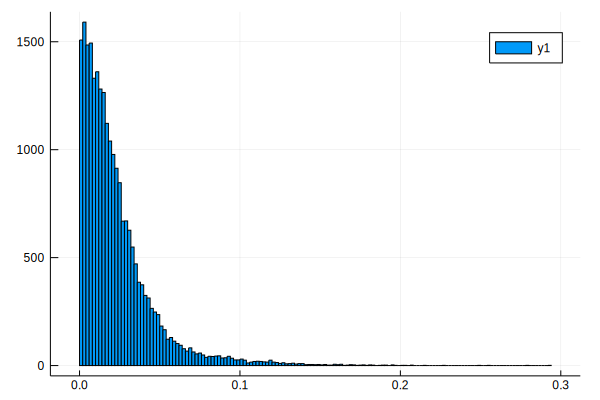

In [46]:
histogram(vec(coef))

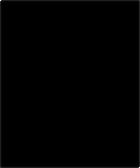

In [47]:
coef = (mat[3,:,:])
coef_min = minimum(coef)
coef_max = maximum(coef)
Gray.((coef .- coef_min)./(coef_max - coef_min))

In [48]:
coef

168×140 Array{Float64,2}:
 1.05929   0.393789  0.288843  0.278523  …  0.281281  0.302192  0.390213
 0.393789  0.221231  0.19012   0.186783     0.189079  0.208888  0.302192
 0.288843  0.19012   0.170143  0.167929     0.170053  0.189079  0.281281
 0.278523  0.186783  0.167929  0.165836     0.167926  0.186744  0.278241
 0.278078  0.186636  0.167831  0.165744     0.167831  0.186636  0.278074
 0.278071  0.186634  0.16783   0.165743  …  0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743  …  0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 0.278071  0.186634  0.16783   0.165743     0.16783   0.186634  0.278071
 ⋮                       

In [ ]:
#histogram(vec(sqrt.(coef))) # stucked on it, why?

In [ ]:
size(vec(coef))

In [ ]:
function local_reg(h=1.0)
        
    mat = zeros(3, size(toad_noised,1), size(toad_noised,2))

    for i=1:size(toad_noised,1)
        for j=1:size(toad_noised,2)
            ij = [i;j]
            Wx = K.(sum(abs.(ij .- IJ),dims=1)/h)
            _X = sum(ij .- IJ, dims=1)
            X = cat(1, _X, dims=1)

            l = inv((X .* Wx) * X') * (X .* Wx)
            a = l * Y'

            mat[1,i,j] = a[1,1]
            mat[2,i,j] = a[2,1]
            mat[3,i,j] = sum(l.^2)
        end
    end
    
    return mat
end

In [80]:
@time mat=local_reg()

 86.691202 seconds (1.11 G allocations: 86.690 GiB, 7.33% gc time)


3×168×140 Array{Float64,3}:
[:, :, 1] =
 0.76603    0.702399   0.734493    …  0.532039     0.564446     0.670048 
 0.0372238  0.0274813  0.00419001     0.000744037  0.00157792  -0.0335263
 1.05929    0.393789   0.288843       0.281281     0.302192     0.390213 

[:, :, 2] =
 0.72816    0.646164   0.652714   …  0.444223    0.489628     0.635665 
 0.0520775  0.0270464  0.0137516     0.00902239  0.00213239  -0.0640597
 0.393789   0.221231   0.19012       0.189079    0.208888     0.302192 

[:, :, 3] =
 0.72848    0.643186     0.641514    …   0.417755     0.440856    0.626797 
 0.0306205  0.00497884  -0.00224199     -0.00889816  -0.0194656  -0.0553009
 0.288843   0.19012      0.170143        0.170053     0.189079    0.281281 

...

[:, :, 138] =
 0.762334  0.689552  0.648691   …   0.500188    0.494965    0.589498 
 0.036459  0.051414  0.0165786     -0.0280462  -0.0149598  -0.0117041
 0.281281  0.189079  0.170053       0.170143    0.19012     0.288843 

[:, :, 139] =
 0.746013   0.67114    

In [83]:
@time mat2=local_reg(5.0)

102.275414 seconds (1.66 G allocations: 99.070 GiB, 7.38% gc time)


3×168×140 Array{Float64,3}:
[:, :, 1] =
 0.727576    0.71757     0.709836   0.700717    …  0.475059     0.489121   
 0.00666719  0.00685299  0.0073137  0.00759529     0.00237774  -0.000885853
 0.0890812   0.0646662   0.0480247  0.0366587      0.0158419    0.0177637  

[:, :, 2] =
 0.715758    0.707687    0.699846    …  0.456537    0.462751     0.478149  
 0.00638809  0.00675585  0.00720555     0.00118632  6.63323e-5  -0.00296883
 0.0646662   0.0473628   0.0354307      0.0124312   0.0137183    0.0158419 

[:, :, 3] =
 0.706706   0.698809    0.691354    0.682133    …   0.455692     0.471882  
 0.0059027  0.00626158  0.00675921  0.00697722     -0.00105213  -0.00393366
 0.0480247  0.0354307   0.0267173   0.020745        0.0124312    0.0146967 

...

[:, :, 138] =
 0.680064    0.667365    0.657704    0.649262    …   0.481721     0.493407  
 0.00611228  0.00531768  0.00498724  0.00465879     -0.00563661  -0.00584519
 0.0146967   0.0124312   0.0110389   0.0101339       0.0354307    0.0480247 

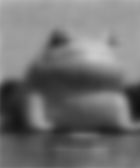

In [85]:
Gray.(mat2[1,:,:])

In [87]:
@time mat3=local_reg(3.0)

102.307317 seconds (1.66 G allocations: 99.052 GiB, 7.49% gc time)


3×168×140 Array{Float64,3}:
[:, :, 1] =
 0.732804    0.717362    0.711598    …  0.486984    0.496449     0.531957  
 0.00821482  0.00836965  0.00908007     0.00729621  0.00293558  -0.00817898
 0.20599     0.124859    0.0814433      0.0365318   0.0397943    0.0468586 

[:, :, 2] =
 0.714512    0.701585    0.694633    …  0.4596       0.475377     0.515204 
 0.00807672  0.00831479  0.00910096     0.00120488  -0.00310967  -0.0127283
 0.124859    0.077206    0.0516499      0.0279789    0.0318395    0.0397943

[:, :, 3] =
 0.703893    0.689012    0.682783    0.67298     …   0.464566     0.507255 
 0.00704257  0.00667519  0.00818602  0.00917288     -0.00731713  -0.0155054
 0.0814433   0.0516499   0.0359659   0.0277797       0.0279789    0.0365318

...

[:, :, 138] =
 0.713938   0.685009   0.665345   …   0.479041     0.49295     0.516932 
 0.0146495  0.0122072  0.0107561     -0.00760587  -0.0100343  -0.0110131
 0.0365318  0.0279789  0.0237545      0.0359659    0.0516499   0.0814433

[:, :, 139

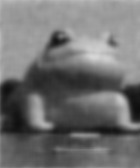

In [88]:
Gray.(mat3[1,:,:])

In [89]:
@time mat4=local_reg(2.0)

 95.324499 seconds (1.66 G allocations: 99.052 GiB, 7.73% gc time)


3×168×140 Array{Float64,3}:
[:, :, 1] =
 0.740516   0.714558   0.711955    …  0.503295    0.520539     0.581831 
 0.0123471  0.0107456  0.00861251     0.00868261  0.00459914  -0.0188272
 0.381407   0.192457   0.117087       0.0757318   0.0823816    0.101169 

[:, :, 2] =
 0.715907   0.69132    0.684242   …  0.457358     0.484099     0.557398 
 0.0140619  0.0126101  0.0100402     0.00209569  -0.00341422  -0.0243661
 0.192457   0.102895   0.0683216     0.0530385    0.0610493    0.0823816

[:, :, 3] =
 0.7069     0.675314    0.670071    …   0.431822     0.463005    0.543302 
 0.0117486  0.00880356  0.00884725     -0.00513152  -0.0113995  -0.0272201
 0.117087   0.0683216   0.049941        0.0443848    0.0530385   0.0757318

...

[:, :, 138] =
 0.742553   0.694156   0.662675   …   0.482122    0.499861    0.537676 
 0.0258952  0.0220925  0.0161647     -0.0106108  -0.0131055  -0.0126093
 0.0757318  0.0530385  0.0443848      0.049941    0.0683216   0.117087 

[:, :, 139] =
 0.73252    0.689748

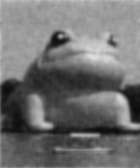

In [90]:
Gray.(mat4[1,:,:])

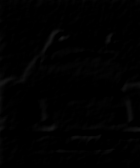

In [91]:
Gray.(mat4[2,:,:])

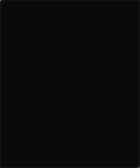

In [92]:
Gray.(mat4[3,:,:])